# **Numpy, SciPy, Matplotlib**

## **Numpy**

[Numpy](http://www.numpy.org/) là thư viện cốt lõi cho tính toán khoa học bằng Python. Nó cung cấp một đối tượng mảng đa chiều hiệu suất cao và các công cụ để làm việc với các mảng này.


- Numpy cung cấp mảng đa chiều

### Arrays/Mảng

Mảng `numpy` là một lưới các giá trị, tất cả có cùng kiểu, và được đánh chỉ mục bởi một bộ (tuple) các số nguyên không âm. Số chiều là cấp (rank) của mảng; hình dạng của một mảng là một bộ (tuple) số nguyên cho biết kích thước của mảng theo từng chiều.

Chúng ta có thể khởi tạo mảng `numpy` từ các danh sách lồng nhau trong Python và truy cập các phần tử bằng cách sử dụng dấu ngoặc vuông:

In [ ]:
import numpy as np

a = np.array([1, 2, 3])   # Create a rank 1 array
print(type(a))            # Prints "<class 'numpy.ndarray'>"
print(a.shape)            # Prints "(3,)" , shape trả về kích thước của mảng
print(a[0], a[1], a[2])   # Prints "1 2 3"
a[0] = 5                  # Change an element of the array
print(a)                  # Prints "[5, 2, 3]"

b = np.array([[1,2,3],[4,5,6]])    # Create a rank 2 array
print(b.shape)                     # Prints "(2, 3)"
print(b[0, 0], b[0, 1], b[1, 0])   # Prints "1 2 4"

<class 'numpy.ndarray'>
(3,)
1 2 3
[5 2 3]
(2, 3)
1 2 4


Numpy cũng cung cấp nhiều hàm để tạo mảng:

In [2]:
import numpy as np

a = np.zeros((2,2))   # Create an array of all zeros, tạo ra một dãy toàn số 0
print(a)              # Prints "[[ 0.  0.]
                      #          [ 0.  0.]]"

b = np.ones((1,2))    # Create an array of all ones
print(b)              # Prints "[[ 1.  1.]]"
print(b.shape)

c = np.full((2,2), 7)  # Create a constant array, tất cả các giá trị đều là 7 (giống nhau)
print(c)               # Prints "[[ 7.  7.]
                       #          [ 7.  7.]]"

d = np.eye(2)         # Create a 2x2 identity matrix, ma trận đơn vị
print(d)              # Prints "[[ 1.  0.]
                      #          [ 0.  1.]]"

e = np.random.random((2,2))  # Create an array filled with random values, các giá trị ngẫu nhiên
print(e)                     # Might print "[[ 0.91940167  0.08143941]
                             #               [ 0.68744134  0.87236687]]"

[[0. 0.]
 [0. 0.]]
[[1. 1.]]
(1, 2)
[[7 7]
 [7 7]]
[[1. 0.]
 [0. 1.]]
[[0.25578404 0.68329476]
 [0.45491473 0.65237229]]


Bạn có thể đọc về các phương pháp tạo mảng khác [trong tài liệu](http://docs.scipy.org/doc/numpy/user/basics.creation.html#arrays-creation) .

### Truy cập các phần tử trong mảng

Numpy cung cấp một số cách để truy cập vào các mảng.  

**Cắt lát (Slicing)**: Tương tự như danh sách/list trong Python, các mảng `numpy` có thể được cắt lát/slicing. Vì mảng có thể có nhiều chiều, bạn phải xác định một phạm vi cắt lát cho mỗi chiều của mảng:

In [ ]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3] #kỹ thuật slicing :2 hàng,1:3 là lấy cột 
print(b)

# A slice of an array is a view into the same data, so modifying it
# will modify the original array.
print(a[0, 1])   # Prints "2"
b[0, 0] = 77     # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])   # Prints "77"

[[2 3]
 [6 7]]
2
77


Bạn cũng có thể kết hợp truy cập bằng chỉ số (số nguyên) với truy cập bằng kỹ thuật cắt lát/slicing. Tuy nhiên, việc làm như vậy sẽ cho ra một mảng có số chiều thấp hơn so với mảng gốc.

In [4]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Two ways of accessing the data in the middle row of the array.
# Mixing integer indexing with slices yields an array of lower rank,
# while using only slices yields an array of the same rank as the
# original array:
row_r1 = a[1, :]    # Rank 1 view of the second row of a , cột : nghiwx là lấy hwts tất cả các cột
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a, 1:2 là lấy hàng 1 (hàng thứ 2)
print(row_r1, row_r1.shape)  # Prints "[5 6 7 8] (4,)"
print(row_r2, row_r2.shape)  # Prints "[[5 6 7 8]] (1, 4)"

# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1] # lấy cột 1 , rank 1
col_r2 = a[:, 1:2] # lấy cột 1 , 1:2 lấy từ cột 1 dến 2-1 , rank 2
print(col_r1, col_r1.shape)  # Prints "[ 2  6 10] (3,)"
print(col_r2, col_r2.shape)  # Prints "[[ 2]
                             #          [ 6]
                             #          [10]] (3, 1)"

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[ 2  6 10] (3,)
[[ 2]
 [ 6]
 [10]] (3, 1)


**Truy cập mảng bằng chỉ số số nguyên (Integer array indexing)**: Khi bạn truy cập vào các mảng `numpy` bằng cách sử dụng kỹ thuật slicing, mảng kết quả sẽ luôn là một mảng con của mảng gốc. Ngược lại, truy cập mảng bằng số nguyên cho phép bạn xây dựng các mảng tùy ý bằng cách sử dụng dữ liệu từ một mảng khác. Dưới đây là một ví dụ:

In [14]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

# An example of integer array indexing.
# The returned array will have shape (3,) and
print(a[[0, 1, 2], [0, 1, 0]])  # Prints "[1 4 5]"
# khi chúng ta truy cập các phần tử của a bằng cách sử dụng chỉ số số nguyên [0, 1, 2] trong chiều thứ nhất 
# và chỉ số số nguyên [0, 1, 0] trong chiều thứ hai, kết quả trả về là một mảng mới có hình dạng (3,) 
# và chứa các phần tử a[0, 0], a[1, 1], và a[2, 0].

# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))  # Prints "[1 4 5]"

# When using integer array indexing, you can reuse the same
# element from the source array:
print(a[[0, 0,2, 1], [1, 1,1,0]])  # Prints "[2 2]"

# Equivalent to the previous integer array indexing example
print(np.array([a[0, 1], a[0, 1]]))  # Prints "[2 2]"

[1 4 5]
[1 4 5]
[2 2 6 3]
[2 2]


Một mẹo hữu ích khi sử dụng truy cập mảng bằng chỉ số số nguyên là lựa chọn hoặc thay đổi một phần tử từ mỗi hàng của ma trận:

In [15]:
import numpy as np

# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])

print(a)  # prints "array([[ 1,  2,  3],
          #                [ 4,  5,  6],
          #                [ 7,  8,  9],
          #                [10, 11, 12]])"

# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"

# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10

print(a)  # prints "array([[11,  2,  3],
          #                [ 4,  5, 16],
          #                [17,  8,  9],
          #                [10, 21, 12]])

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[ 1  6  7 11]
[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


**Truy cập mảng bằng chỉ số boolean (Boolean array indexing)**: Truy cập mảng bằng chỉ số boolean cho phép bạn chọn các phần tử tùy ý trong một mảng. Thông thường, loại truy cập này được sử dụng để lựa chọn các phần tử của mảng thỏa mãn một điều kiện nào đó. Dưới đây là một ví dụ:

In [16]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)   # Find the elements of a that are bigger than 2;
                     # this returns a numpy array of Booleans of the same
                     # shape as a, where each slot of bool_idx tells
                     # whether that element of a is > 2.

print(bool_idx)      # Prints "[[False False]
                     #          [ True  True]
                     #          [ True  True]]"

# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])  # Prints "[3 4 5 6]"

# We can do all of the above in a single concise statement:
print(a[a > 2])     # Prints "[3 4 5 6]"

[[False False]
 [ True  True]
 [ True  True]]
[3 4 5 6]
[3 4 5 6]


Vì mục đích ngắn gọn, chúng tôi đã bỏ qua rất nhiều chi tiết về truy cập mảng `numpy`; nếu bạn muốn biết thêm, bạn nên [đọc tài liệu hướng dẫn](http://docs.scipy.org/doc/numpy/reference/arrays.indexing.html).

### Datatypes / Loại dữ liệu

Mỗi mảng `numpy` là một lưới các phần tử cùng loại. `Numpy` cung cấp một bộ đủ lớn các kiểu dữ liệu số học mà bạn có thể sử dụng để tạo mảng. `Numpy` cố gắng đoán kiểu dữ liệu khi bạn tạo một mảng, nhưng các hàm tạo mảng thường cũng bao gồm một đối số tùy chọn để chỉ định rõ ràng kiểu dữ liệu. Dưới đây là một ví dụ:

In [17]:
import numpy as np

x = np.array([1, 2])   # Let numpy choose the datatype
print(x.dtype)         # Prints "int32"

x = np.array([1.0, 2.0])   # Let numpy choose the datatype
print(x.dtype)             # Prints "float64"

x = np.array([1, 2], dtype=np.int64)   # Force a particular datatype
print(x.dtype)                         # Prints "int64"

int64
float64
int64


Bạn có thể đọc tất cả về các kiểu dữ liệu numpy trong [tài liệu hướng dẫn](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

### Array math / Tính toán trên mảng

Các hàm toán học cơ bản hoạt động trên từng phần tử của mảng và có sẵn dưới dạng cả nạp chồng/quá tải toán tử (operator overloads) và các hàm trong module `numpy`:

In [18]:
import numpy as np

x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
# [[ 6.0  8.0]
#  [10.0 12.0]]
print(x + y)
print(np.add(x, y))

# Elementwise difference; both produce the array
# [[-4.0 -4.0]
#  [-4.0 -4.0]]
print(x - y)
print(np.subtract(x, y))

# Elementwise product; both produce the array
# [[ 5.0 12.0]
#  [21.0 32.0]]
print(x * y)
print(np.multiply(x, y))

# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]
[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]
[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[1.         1.41421356]
 [1.73205081 2.        ]]


Toán tử `*` trong `numpy` thực hiện phép nhân từng phần tử, không phải phép nhân ma trận. Thay vào đó, chúng ta sử dụng hàm `dot` để tính tích vô hướng của các vector (inner products of vectors), nhân một vector với một ma trận và nhân các ma trận với nhau. `dot` có sẵn cả là một hàm trong module `numpy` và là một phương thức thể hiện của đối tượng mảng (array objects):

In [ ]:
import numpy as np

x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w)) #(9 * 11 + 10 * 12 = 219)
print(np.dot(v, w))

# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v)) # (1*9 + 2*10 , 3*9 +4*10) = [29 67]
print(np.dot(x, v))

# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y)) # (1*5+2*7 , 1*6+2*8 ; 3*5+4*7 , 3*6+4*8) = [[19 22] ; [43 50]]
print(np.dot(x, y)) 

219
219
[29 67]
[29 67]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Numpy cung cấp nhiều hàm hữu ích để thực hiện các tính toán trên mảng; một trong những hàm hữu ích nhất là hàm `sum`:

In [20]:
import numpy as np

x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

arr = np.array([[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]])

# Tính tổng theo trục 0 (tổng các phần tử cùng vị trí trên các hàng)
sum_axis_0 = np.sum(arr, axis=0)

print(sum_axis_0)
# Kết quả: [12 15 18]

# Tính tổng theo trục 1 (tổng các phần tử cùng vị trí trên các cột)
sum_axis_1 = np.sum(arr, axis=1)

print(sum_axis_1)
# Kết quả: [ 6 15 24]

10
[4 6]
[3 7]
[12 15 18]
[ 6 15 24]


Dưới đây là một số ví dụ về các hàm tính toán khác trong `numpy`:

In [21]:
# Hàm np.mean(): Tính giá trị trung bình của mảng
import numpy as np

arr = np.array([1, 2, 3, 4, 5])

mean_value = np.mean(arr)

print(mean_value)  # Kết quả: 3.0


# Hàm np.max(): Tìm giá trị lớn nhất trong mảng
arr = np.array([1, 2, 3, 4, 5])

max_value = np.max(arr)

print(max_value)  # Kết quả: 5


# Hàm np.min(): Tìm giá trị nhỏ nhất trong mảng
arr = np.array([1, 2, 3, 4, 5])

min_value = np.min(arr)

print(min_value)  # Kết quả: 1

# Hàm np.median(): Tìm giá trị trung vị của mảng
arr = np.array([1, 2, 3, 4, 5])

median_value = np.median(arr)

print(median_value)  # Kết quả: 3.0

# Hàm np.std(): Tính độ lệch chuẩn của mảng
arr = np.array([1, 2, 3, 4, 5])

std_value = np.std(arr)

print(std_value)  # Kết quả: 1.4142135623730951

3.0
5
1
3.0
1.4142135623730951


Đây chỉ là một số ví dụ cơ bản về các hàm tính toán trên mảng trong numpy. Ngoài ra, `numpy` còn cung cấp nhiều hàm khác như `np.sum()`, `np.prod()`, `np.var()`, `np.exp()`, `np.log()`, và nhiều hàm khác nữa để thực hiện các phép tính toán phổ biến trên mảng.  
Bạn có thể tìm danh sách đầy đủ các hàm toán học được cung cấp bởi numpy [trong tài liệu](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

Ngoài việc tính toán các hàm toán học sử dụng mảng, chúng ta thường cần thay đổi hình dạng hoặc xử lý dữ liệu trong mảng. Ví dụ đơn giản nhất của loại thao tác này là chuyển vị ma trận; để chuyển vị một ma trận, chỉ cần sử dụng thuộc tính `T` của đối tượng mảng:

In [22]:
import numpy as np

x = np.array([[1,2], [3,4]])
print(x)    # Prints "[[1 2]
            #          [3 4]]"
print(x.T)  # Prints "[[1 3]
            #          [2 4]]"

# Note that taking the transpose of a rank 1 array does nothing:
v = np.array([1,2,3])
print(v)    # Prints "[1 2 3]"
print(v.T)  # Prints "[1 2 3]"

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]
[1 2 3]
[1 2 3]


Numpy cung cấp nhiều hàm khác để thao tác trên mảng; bạn có thể xem danh sách đầy đủ [trong tài liệu](http://docs.scipy.org/doc/numpy/reference/routines.array-manipulation.html).

### Broadcasting

Broadcasting là một cơ chế mạnh mẽ cho phép `numpy` làm việc với các mảng có hình dạng khác nhau khi thực hiện các phép toán số học. Thường thì chúng ta có một mảng nhỏ hơn và một mảng lớn hơn, và chúng ta muốn sử dụng mảng nhỏ nhiều lần để thực hiện một số phép toán trên mảng lớn.

Ví dụ, giả sử chúng ta muốn cộng một vector hằng số vào mỗi hàng của một ma trận. Chúng ta có thể thực hiện như sau:

In [23]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

# Now y is the following
# [[ 2  2  4]
#  [ 5  5  7]
#  [ 8  8 10]
#  [11 11 13]]
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Phương pháp trước đó hoạt động; tuy nhiên, khi ma trận `x` rất lớn, tính toán một vòng lặp rõ ràng trong Python có thể chậm. Lưu ý rằng việc thêm vector `v` vào mỗi hàng của ma trận `x` tương đương với việc tạo ra một ma trận `vv` bằng cách xếp chồng nhiều bản sao của `v` theo chiều dọc, sau đó thực hiện phép cộng từng phần tử của `x` và `vv`. Chúng ta có thể thực hiện phương pháp này như sau:

In [24]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
vv = np.tile(v, (4, 1))   # Stack 4 copies of v on top of each other
# (4, 1) là tham số truyền vào np.tile(), cho biết chúng ta muốn xếp chồng 4 bản sao của v theo chiều dọc (4 hàng) 
# và 1 lần theo chiều ngang (1 cột). 

print(vv)                 # Prints "[[1 0 1]
                          #          [1 0 1]
                          #          [1 0 1]
                          #          [1 0 1]]"
y = x + vv  # Add x and vv elementwise
print(y)  # Prints "[[ 2  2  4
          #          [ 5  5  7]
          #          [ 8  8 10]
          #          [11 11 13]]"

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


`Numpy` broadcasting cho phép chúng ta thực hiện tính toán này mà không cần tạo ra nhiều bản sao của `v`. Hãy xem phiên bản này sử dụng broadcasting:

In [25]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print(y)  # Prints "[[ 2  2  4]
          #          [ 5  5  7]
          #          [ 8  8 10]
          #          [11 11 13]]"

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Dòng lệnh `y = x + v` hoạt động ngay cả khi `x` có hình dạng `(4, 3)` và `v` có hình dạng `(3,)` nhờ vào broadcasting; dòng lệnh này hoạt động như thể `v` thực sự có hình dạng `(4, 3)`, trong đó mỗi hàng là một bản sao của `v`, và phép cộng được thực hiện từng phần tử.

Broadcasting hai mảng với nhau tuân theo các quy tắc sau:

- Nếu hai mảng không có cùng rank, thêm các chiều của mảng có rank thấp hơn với giá trị 1 cho đến khi cả hai hình dạng có cùng độ dài.
- Hai mảng được cho là tương thích trong một chiều nếu chúng có cùng kích thước trong chiều đó hoặc nếu một trong hai mảng có kích thước bằng 1 trong chiều đó.
- Các mảng có thể được broadcast cùng nhau nếu chúng tương thích trong tất cả các chiều.
- Sau khi broadcasting, mỗi mảng được xem như có hình dạng bằng giá trị tối đa của các hình dạng của hai mảng đầu vào.
- Trong bất kỳ chiều nào mà một mảng có kích thước bằng 1 và mảng khác có kích thước lớn hơn 1, mảng đầu tiên được xem như được sao chép theo chiều đó.

Nếu giải thích này không rõ ràng, hãy thử đọc giải thích [từ tài liệu](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) hoặc [giải thích này](https://scipy.github.io/old-wiki/pages/EricsBroadcastingDoc).

Các hàm hỗ trợ broadcasting được gọi là universal functions. Bạn có thể tìm danh sách tất cả các universal functions [trong tài liệu](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

Dưới đây là một số ứng dụng của broadcasting:

In [26]:
import numpy as np

# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:
# [[ 4  5]
#  [ 8 10]
#  [12 15]]
print(np.reshape(v, (3, 1)) * w)

# bạn có thể thử với np.outer(v, w)

# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:
# [[2 4 6]
#  [5 7 9]]
print(x + v)

# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:
# [[ 5  6  7]
#  [ 9 10 11]]
print((x.T + w).T)
# Another solution is to reshape w to be a column vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print(x + np.reshape(w, (2, 1)))

# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
# [[ 2  4  6]
#  [ 8 10 12]]
print(x * 2)

[[ 4  5]
 [ 8 10]
 [12 15]]
[[2 4 6]
 [5 7 9]]
[[ 5  6  7]
 [ 9 10 11]]
[[ 5  6  7]
 [ 9 10 11]]
[[ 2  4  6]
 [ 8 10 12]]


Sử dụng `numpy.outer()` để tích tích ngoài của hai vector
Đây là cách trực tiếp và phổ biến nhất.  
Tích ngoài (outer product) của hai vector trong `Numpy` là một phép toán tạo ra một ma trận. Mỗi phần tử của ma trận này được tính bằng cách nhân mỗi phần tử của vector thứ nhất với mỗi phần tử của vector thứ hai. 

In [27]:
import numpy as np

a = np.array([1, 2, 3])
b = np.array([4, 5])

# Tính tích ngoài
outer_product = np.outer(a, b)

print(outer_product)

[[ 4  5]
 [ 8 10]
 [12 15]]


Broadcasting thường khiến mã code của bạn ngắn gọn và chạy nhanh hơn, do đó bạn nên cố gắng sử dụng nó khi có thể.

### Numpy Documentation / Tài liệu về Numpy

Tổng quan ngắn gọn này đã đề cập đến nhiều điều quan trọng mà bạn cần biết về NumPy, nhưng nó chưa đầy đủ. Hãy tham khảo [tài liệu tham khảo của NumPy](http://docs.scipy.org/doc/numpy/reference/) để tìm hiểu thêm về NumPy.

## **SciPy**

NumPy cung cấp một mảng đa chiều hiệu suất cao và các công cụ cơ bản để tính toán và làm việc với các mảng này. [SciPy](http://docs.scipy.org/doc/scipy/reference/) được xây dựng dựa trên nền tảng của NumPy và cung cấp một số lượng lớn các hàm hoạt động trên các mảng NumPy và hữu ích cho các ứng dụng khoa học và kỹ thuật khác nhau.

Cách tốt nhất để làm quen với SciPy là [duyệt qua tài liệu](http://docs.scipy.org/doc/scipy/reference/index.html). Chúng tôi sẽ tóm lược một số phần của SciPy mà bạn có thể thấy hữu ích cho lớp học này.

### Các phép toán trên hình ảnh / Image operations

**Hình ảnh và xử lý hình ảnh:** SciPy cung cấp các công cụ để đọc, ghi và xử lý hình ảnh. Bạn có thể thực hiện các phép biến đổi hình ảnh, thay đổi kích thước, lọc ảnh, phân đoạn hình ảnh, và nhiều tác vụ khác liên quan đến xử lý hình ảnh.

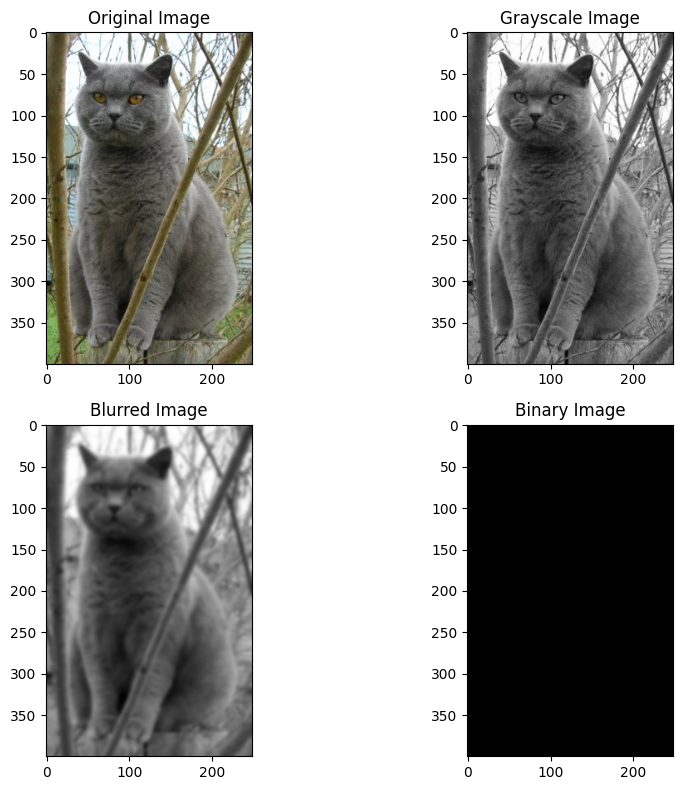

In [29]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

# Đọc ảnh từ file
image = plt.imread('cat.jpg')

# Chuyển đổi ảnh sang ảnh xám
gray_image = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])

# Áp dụng bộ lọc Gaussian để làm mờ ảnh
blurred_image = ndimage.gaussian_filter(gray_image, sigma=2)

# Phân ngưỡng ảnh để tạo hình ảnh nhị phân
threshold = 0.5
binary_image = blurred_image > threshold

# Lấy các vùng liên thông trong ảnh nhị phân
labeled_image, num_features = ndimage.label(binary_image)

# Hiển thị ảnh gốc, ảnh xám, ảnh làm mờ, và ảnh nhị phân
plt.figure(figsize=(10, 8))
plt.subplot(221)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(222)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')

plt.subplot(223)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')

plt.subplot(224)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')

plt.tight_layout()
plt.show()

### Khoảng cách giữa các điểm

SciPy định nghĩa một số hàm hữu ích để tính toán khoảng cách giữa các tập hợp điểm.

Hàm `scipy.spatial.distance.pdist` tính toán khoảng cách giữa tất cả các cặp điểm trong một tập hợp đã cho:

In [30]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

# Create the following array where each row is a point in 2D space:
# [[0 1]
#  [1 0]
#  [2 0]]
x = np.array([[0, 1], [1, 0], [2, 0]])
print(x)

# Compute the Euclidean distance between all rows of x.
# d[i, j] is the Euclidean distance between x[i, :] and x[j, :],
# and d is the following array:
# [[ 0.          1.41421356  2.23606798]
#  [ 1.41421356  0.          1.        ]
#  [ 2.23606798  1.          0.        ]]
d = squareform(pdist(x, 'euclidean'))
print(d)

[[0 1]
 [1 0]
 [2 0]]
[[0.         1.41421356 2.23606798]
 [1.41421356 0.         1.        ]
 [2.23606798 1.         0.        ]]


Bạn có thể đọc tất cả các chi tiết về hàm này trong tài liệu hướng dẫn.

Một hàm tương tự (`scipy.spatial.distance.cdist`) tính toán khoảng cách giữa tất cả các cặp điểm giữa hai tập hợp điểm; bạn có thể đọc về nó trong [tài liệu hướng dẫn](http://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html).

## **Matplotlib**

[Matplotlib](http://matplotlib.org/) là một thư viện vẽ đồ thị. Trong phần này, chúng ta sẽ đưa ra một giới thiệu ngắn về module `matplotlib.pyplot`.

### Plotting

Hàm quan trọng nhất trong Matplotlib là `plot`, cho phép bạn vẽ đồ thị 2D. Dưới đây là một ví dụ đơn giản:

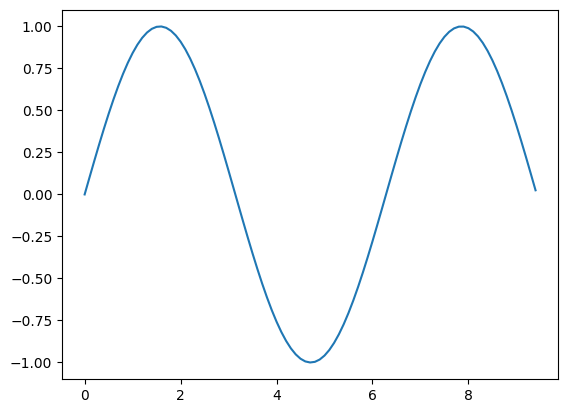

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)
plt.show()  # You must call plt.show() to make graphics appear.

Với một số bổ sung, chúng ta có thể dễ dàng vẽ nhiều đường đồng thời và thêm tiêu đề, chú thích và nhãn trục, v.v.

Bạn có thể đọc thêm về hàm `plot` trong [tài liệu hướng dẫn](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot).

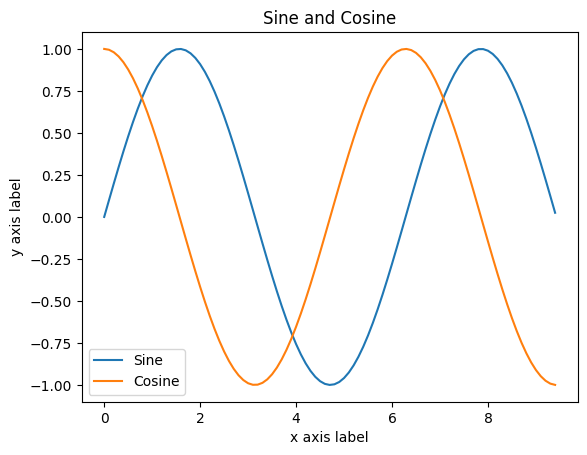

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])
plt.show()

### Subplots

Bạn có thể vẽ các yếu tố khác nhau trong cùng một hình sử dụng hàm `subplot`. Dưới đây là một ví dụ:

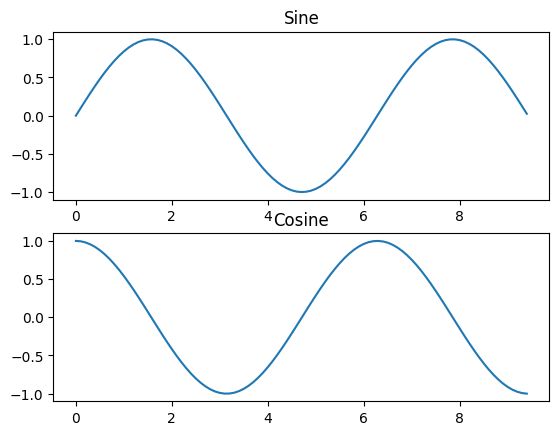

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

Bạn có thể đọc nhiều thông tin hơn về hàm `subplot` trong [tài liệu hướng dẫn](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).

### Images

Bạn có thể sử dụng hàm `imshow` để hiển thị hình ảnh. Dưới đây là một ví dụ:

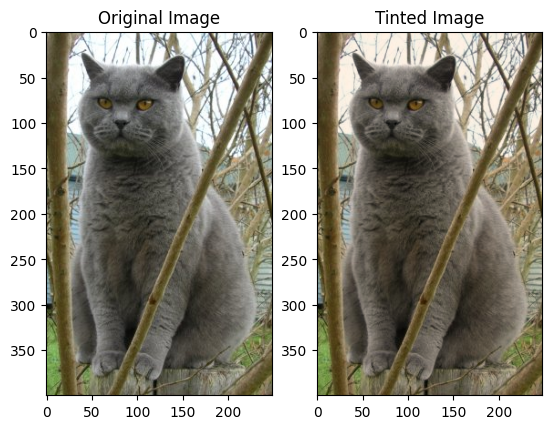

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the image
img = Image.open('cat.jpg')
img_arr = np.array(img)

# Apply tint to the image
img_tinted = img_arr * [1, 0.95, 0.9]

# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(img_arr)
plt.title('Original Image')

# Show the tinted image
plt.subplot(1, 2, 2)
plt.imshow(np.uint8(img_tinted))
plt.title('Tinted Image')

# Display the figure
plt.show()

## References:

- [Python Numpy Tutorial](https://cs231n.github.io/python-numpy-tutorial/) 